In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

# Import scaffoldgraph
import scaffoldgraph as sg

# Import networkx
import networkx as nx

# Import plotting tools
import matplotlib.pyplot as plt

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem

import random
import os

In [5]:
data = pd.read_csv('/home/marcossantana/Downloads/generated_mols_filtered.csv')
print(data.shape)

(35351, 14)


In [4]:
data.head()

,Smiles,MW,LogP,HBD,HBA,Rot,TPSA,charge,HAC,Rings,SAScore,PAINS_FILTER,Id,timestamp
0,N[C@H](CC(=O)N1CCN(Cc2cccc(F)c2Cl)C(=O)C1)Cc1c...,421.875,2.74910,1,3,6,66.64,0,29,3,2.842373,NaN,mol-6-30/05/2021-03:54:14,30/05/2021-03:54:14
1,CC(C)[C@H](NC(=O)Cc1cccc2ccccc12)C(=O)N1CCC[C@...,483.568,4.53820,1,5,7,92.51,0,36,5,3.206110,NaN,mol-7-30/05/2021-03:54:14,30/05/2021-03:54:14
2,COC(=O)c1cccc(C(Nc2ccc(C(=N)N)cc2)c2cc(C)n(C)c...,376.460,3.60569,3,5,6,93.13,0,28,3,3.061017,NaN,mol-9-30/05/2021-03:54:14,30/05/2021-03:54:14
3,CCCCCC(=O)N1Cc2ccccc2C[C@H]1C(=O)N[C@@H](Cc1cc...,465.594,3.00230,2,4,10,87.74,0,34,3,2.988836,NaN,mol-11-30/05/2021-03:54:14,30/05/2021-03:54:14
4,O=C(O)c1ccc(NC(=O)n2sc3ccccc3c2=O)cc1,314.322,2.84140,2,5,2,88.40,0,22,3,2.235375,NaN,mol-12-30/05/2021-03:54:14,30/05/2021-03:54:14


In [23]:
columns = data.columns[1:].tolist()

In [10]:
mols = list(map(Chem.MolFromSmiles, data.Smiles))

In [9]:
sg.get_all_murcko_fragments(mols[0])

In [15]:
frags = map(sg.get_all_murcko_fragments,mols)

In [16]:
frags_collection = {f for col in frags for f in col}

In [19]:
frags_collection=list(frags_collection)

/home/marcossantana/anaconda3/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


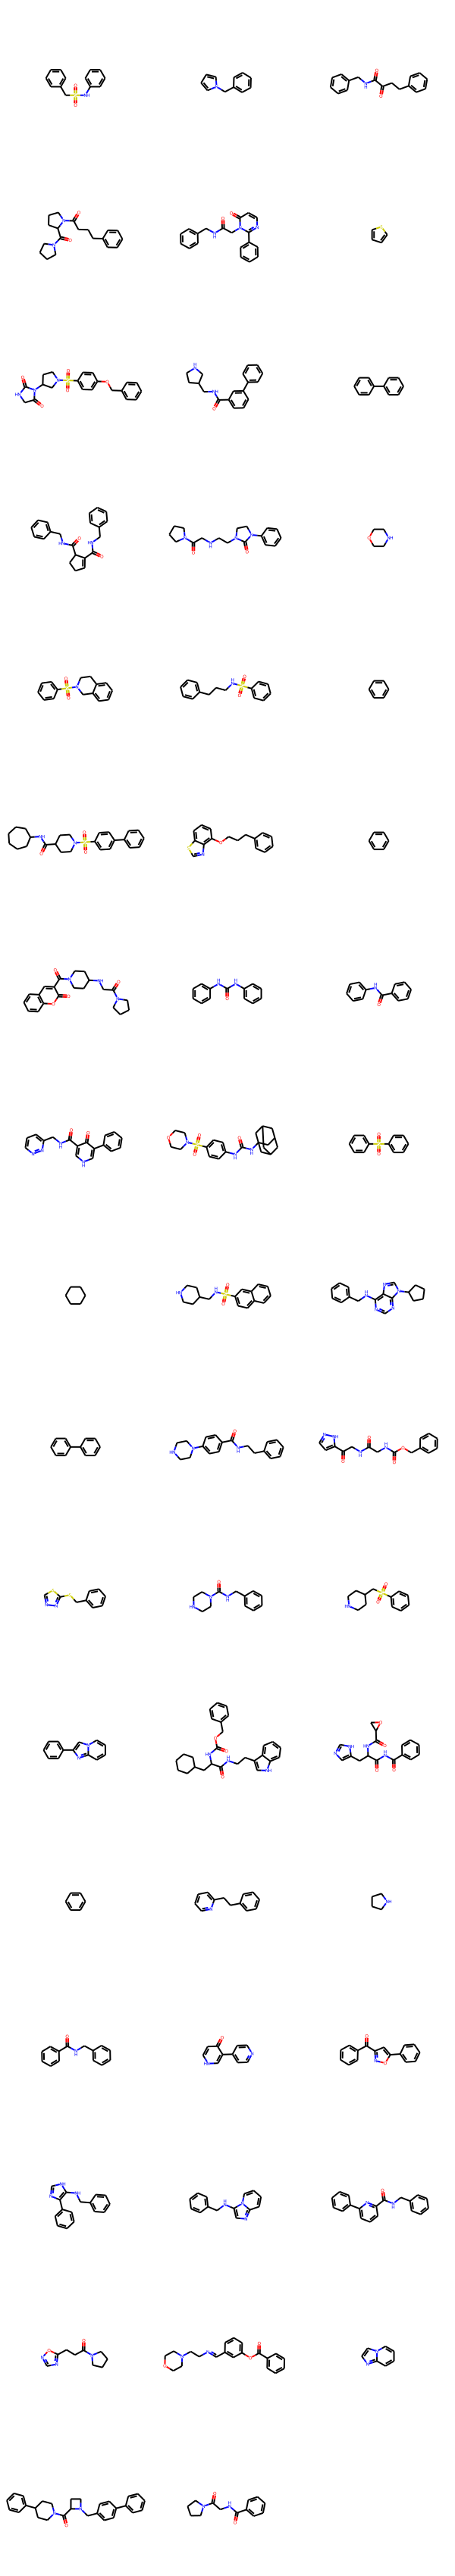

In [20]:
Draw.MolsToGridImage(frags_collection)

# Network

In [21]:
help(sg.ScaffoldNetwork.from_dataframe)

Help on method from_dataframe in module scaffoldgraph.core.graph:

from_dataframe(df, smiles_column='Smiles', name_column='Name', data_columns=None, ring_cutoff=10, progress=False, annotate=True, flatten_isotopes=False, keep_largest_fragment=False, discharge_and_deradicalize=False, **kwargs) method of abc.ABCMeta instance
    Construct a ScaffoldGraph from a pandas DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        A pandas DataFrame containing SMILES strings and a molecule identifier.
    smiles_column : value, optional
        Label of column containing SMILES strings. The default is 'Smiles'.
    name_column : str
        Label of column containing SMILES strings. The default is 'Name'.
    data_columns : list
        List of column keys to be included in the molecule node attributes.
    ring_cutoff : int, optional
        Ignore molecules with more rings than this cutoff. The default is 10.
    progress : bool, optional
        If True display a progress b

In [26]:
network = sg.ScaffoldNetwork.from_dataframe(df=data, smiles_column='Smiles',name_column='Smiles',data_columns=columns,progress=True)

In [30]:
nt_scaffolds = list(network.get_scaffold_nodes())

/home/marcossantana/anaconda3/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


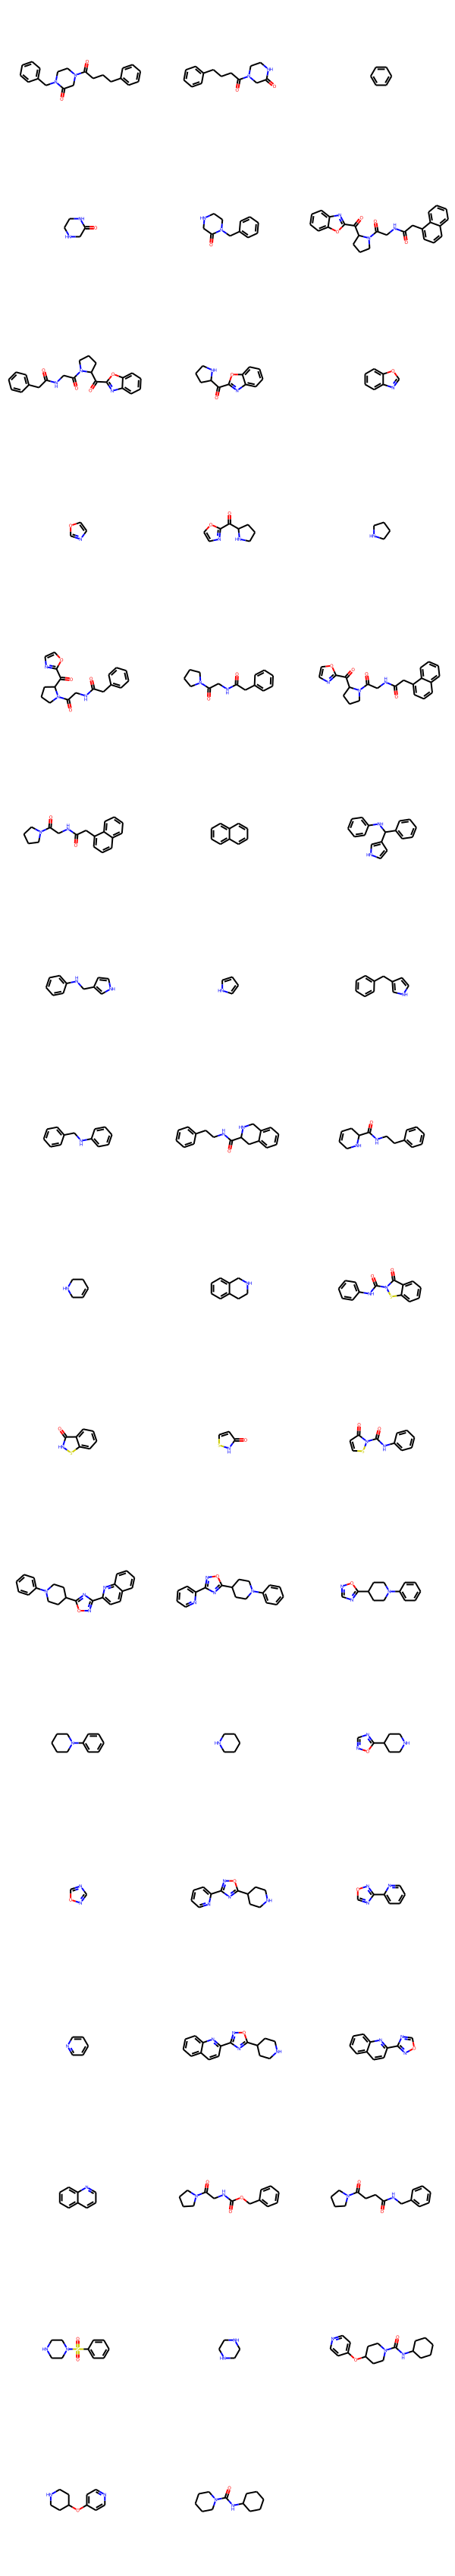

In [32]:
Draw.MolsToGridImage(list(map(Chem.MolFromSmiles,nt_scaffolds)))